In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from dotenv import load_dotenv
import os

In [4]:
load_dotenv()

True

In [5]:
# Функции для запроса данных по API
def fetch_visits(api_url, start_date, end_date):
    response = requests.get(f"{api_url}/visits", params={'begin': start_date, 'end': end_date})
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

def fetch_registrations(api_url, start_date, end_date):
    response = requests.get(f"{api_url}/registrations", params={'begin': start_date, 'end': end_date})
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

In [6]:
# Запрос данных
api_url = os.getenv("API_URL")  # URL API должен быть сохранен в .env файле
start_date = "2023-03-01"
end_date = "2023-09-01"

visits_data = fetch_visits(api_url, start_date, end_date)
registrations_data = fetch_registrations(api_url, start_date, end_date)

In [7]:
# Преобразование данных в DataFrame
visits_df = pd.DataFrame(visits_data)
registrations_df = pd.DataFrame(registrations_data)

In [8]:
# Первичный анализ данных
print("Visits DataFrame Description:")
print(visits_df.describe())

print("Registrations DataFrame Description:")
print(registrations_df.describe())

print("First 5 rows of Visits DataFrame:")
print(visits_df.head())

print("First 5 rows of Registrations DataFrame:")
print(registrations_df.head())

Visits DataFrame Description:
                             datetime platform  \
count                          263459   263459   
unique                         261204        4   
top     Thu, 06 Jul 2023 10:45:50 GMT      web   
freq                                3   236301   

                                               user_agent  \
count                                              263459   
unique                                                 32   
top     Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...   
freq                                                13623   

                                    visit_id  
count                                 263459  
unique                                146085  
top     64167edd-323a-4ab0-be9b-acd237a1ac30  
freq                                       4  
Registrations DataFrame Description:
                             datetime               email platform  \
count                           21836               21836    21836   
u

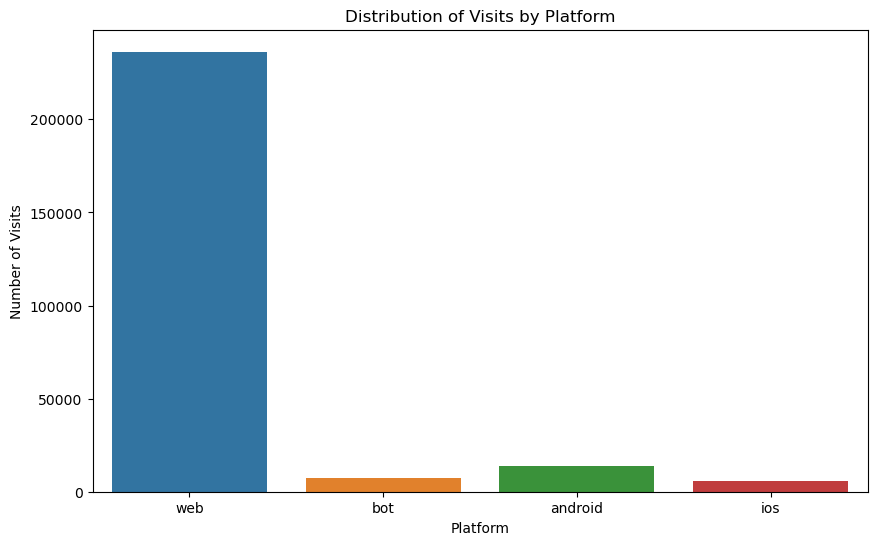

In [9]:
# Визуализация данных посещений по платформам
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', data=visits_df)
plt.title('Distribution of Visits by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Visits')
plt.show()


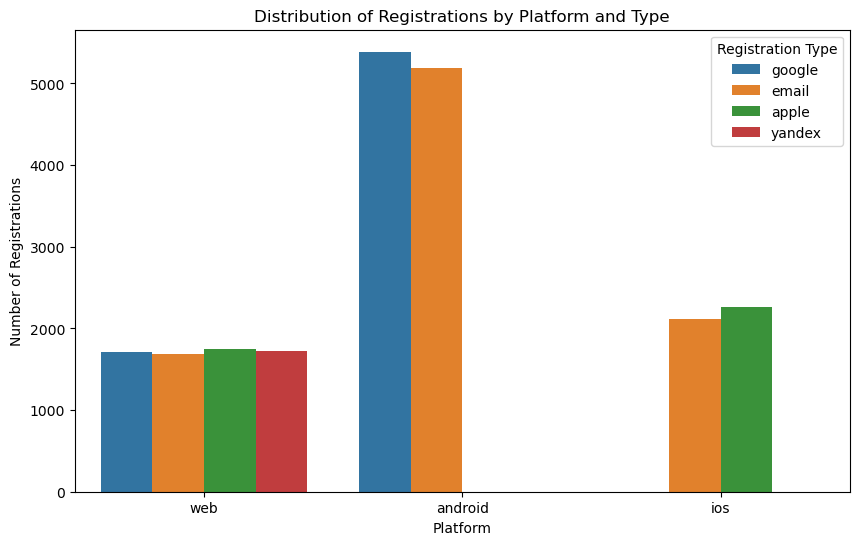

In [10]:
# Визуализация данных регистраций по платформам и типам регистраций
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', hue='registration_type', data=registrations_df)
plt.title('Distribution of Registrations by Platform and Type')
plt.xlabel('Platform')
plt.ylabel('Number of Registrations')
plt.legend(title='Registration Type')
plt.show()